
Reading file:  C:\Users\asg_a_1p8y6mm\OneDrive\Desktop\WIOA Training\DataAnalytics\Module 7\Module 7; Class Project\Data Cleaning 2014\survey.csv
Shape - default:  (1259, 27)
Shape - filtered:  (1259, 27)
Shape - column filtered:  (1259, 25)
Shape - combined data:  (1259, 25)
Shape - combined data:  (1259, 25)
   Age  Gender         Country state self-employed family history treatment  \
0   37  Female   United States    IL           NaN             No       Yes   
1   44       M   United States    IN           NaN             No        No   
2   32    Male          Canada   NaN           NaN             No        No   
3   31    Male  United Kingdom   NaN           NaN            Yes       Yes   
4   31    Male   United States    TX           NaN             No        No   
5   33    Male   United States    TN           NaN            Yes        No   
6   35  Female   United States    MI           NaN            Yes       Yes   
7   39       M          Canada   NaN           NaN     

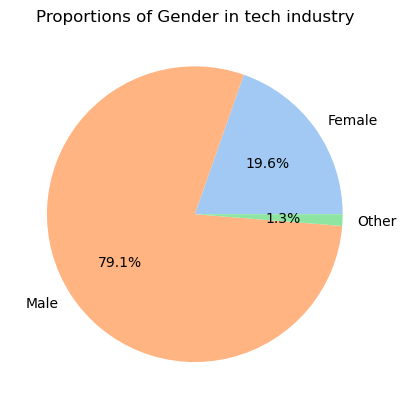

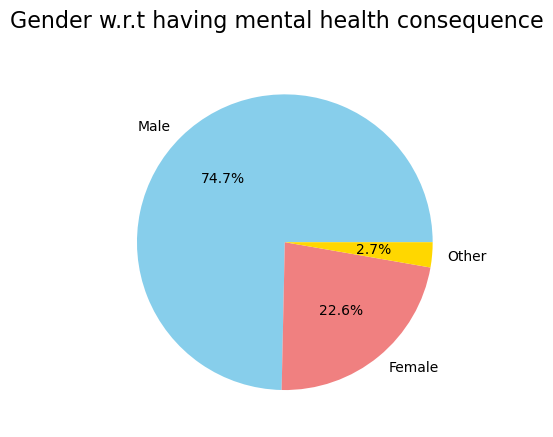

count     1259
unique       3
top         No
freq       490
Name: mental health consequence, dtype: object


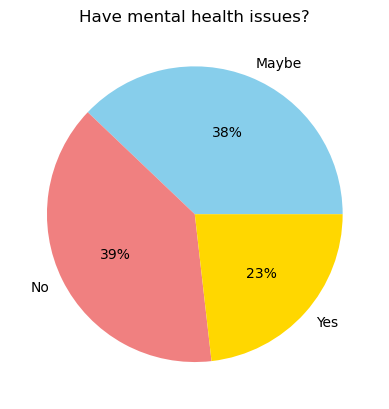

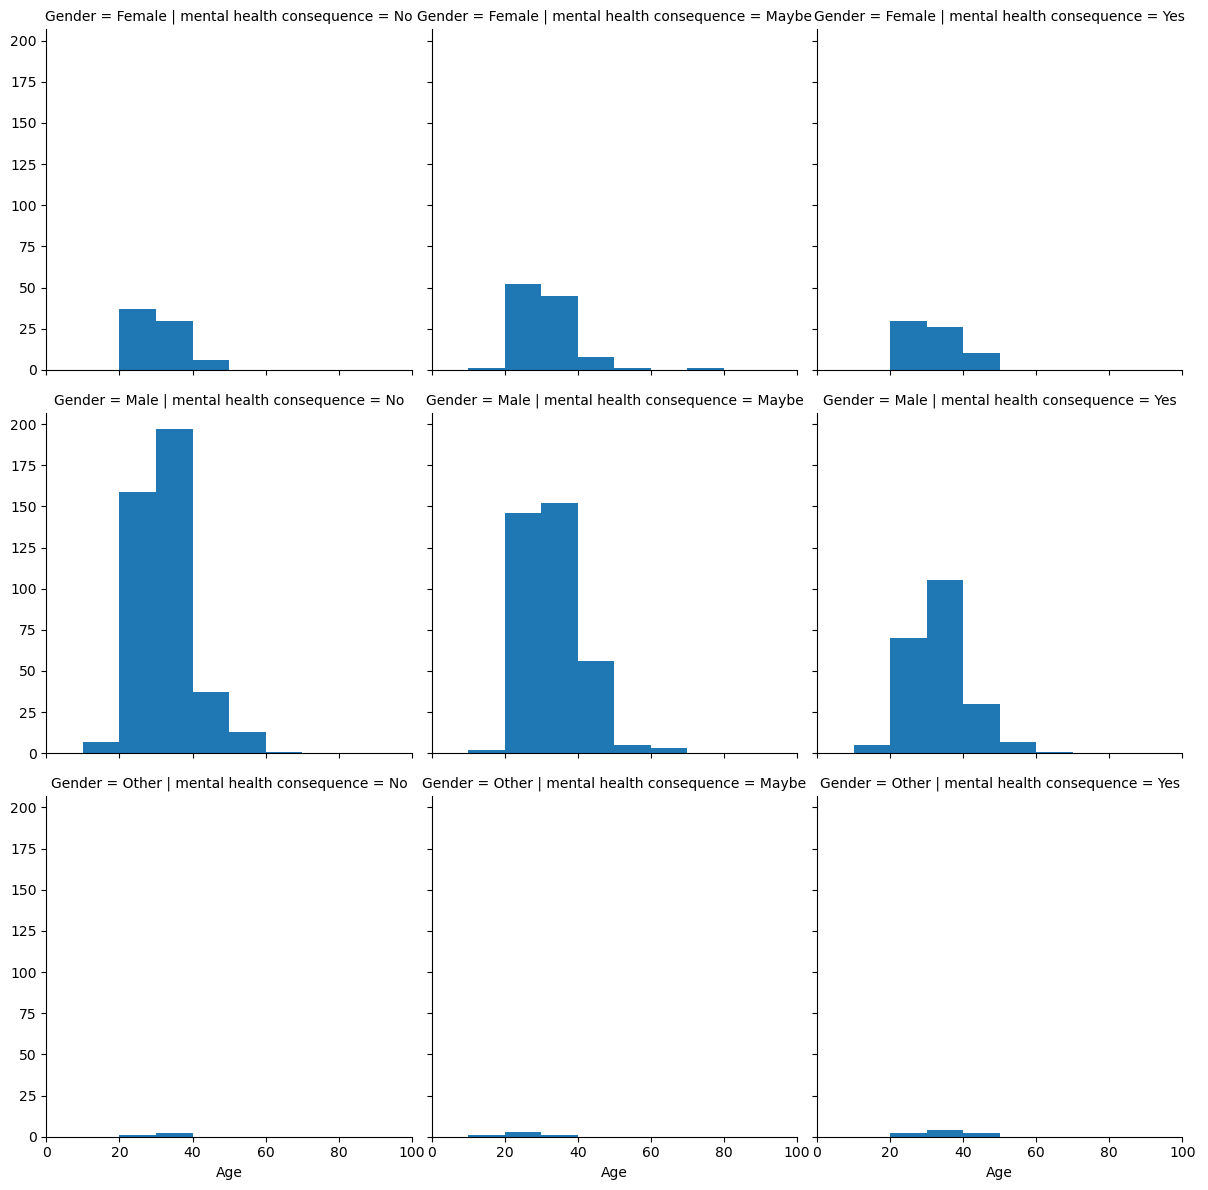

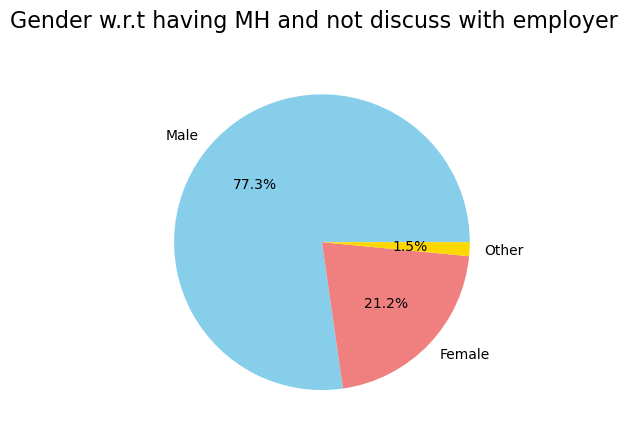

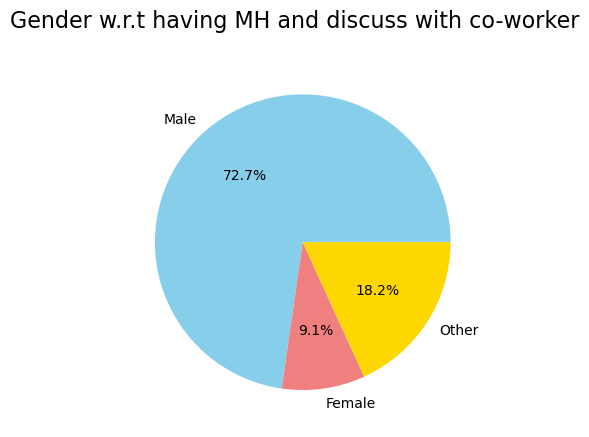

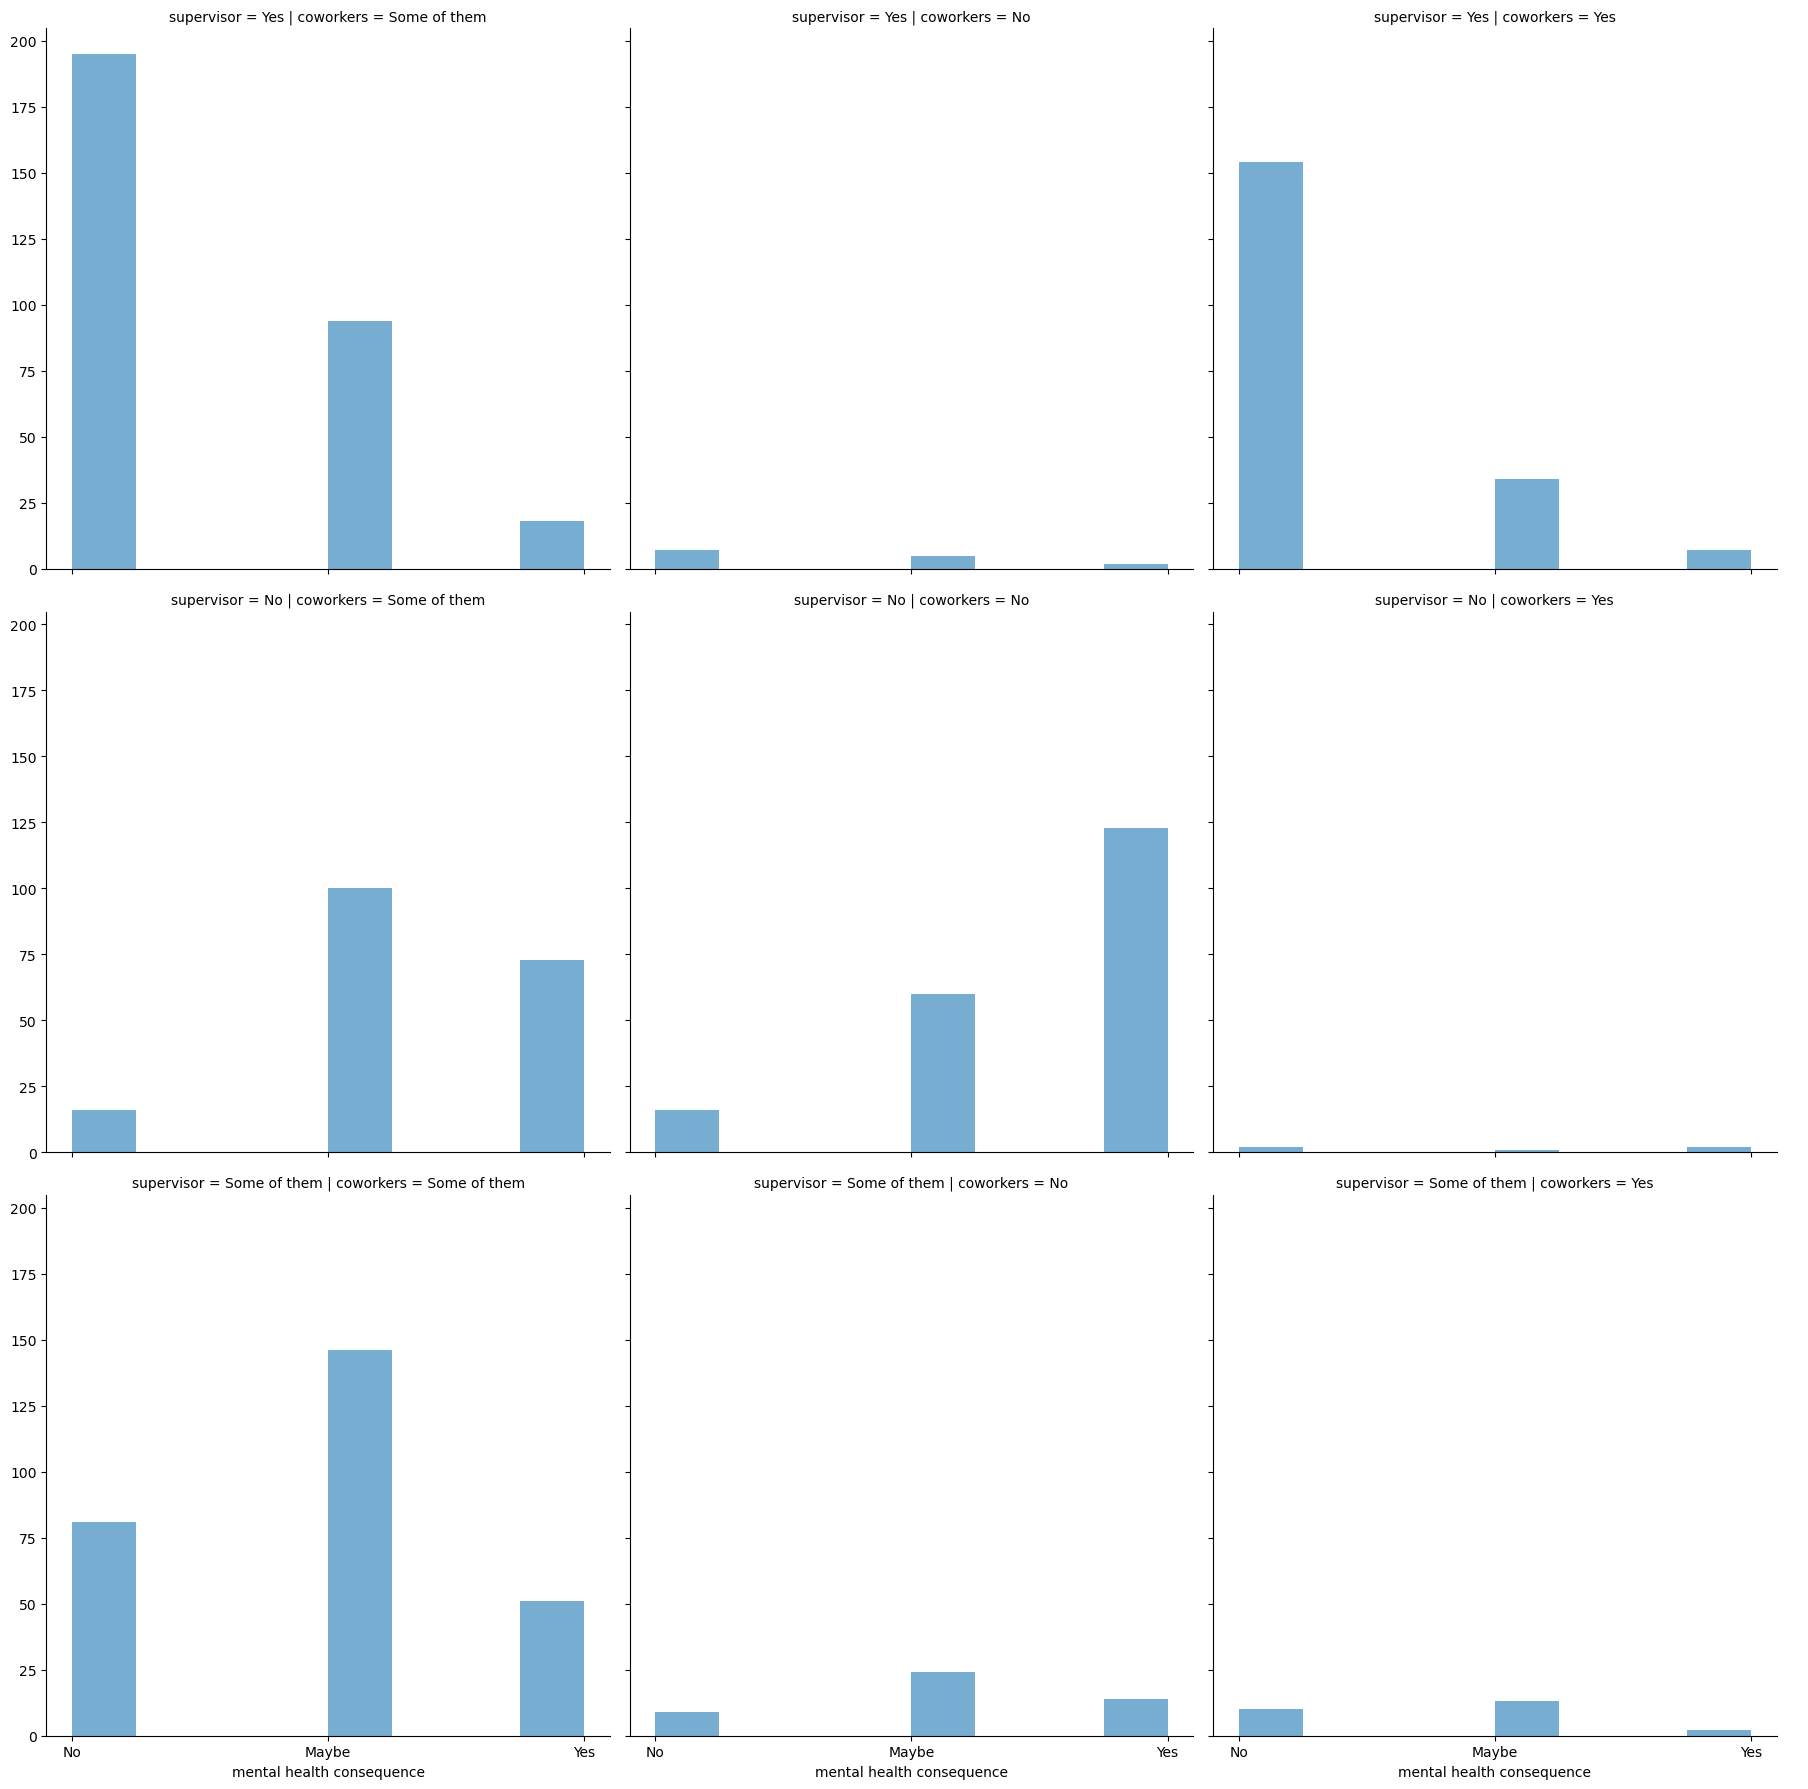

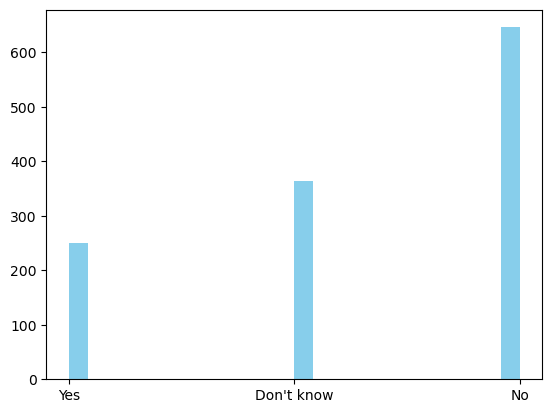

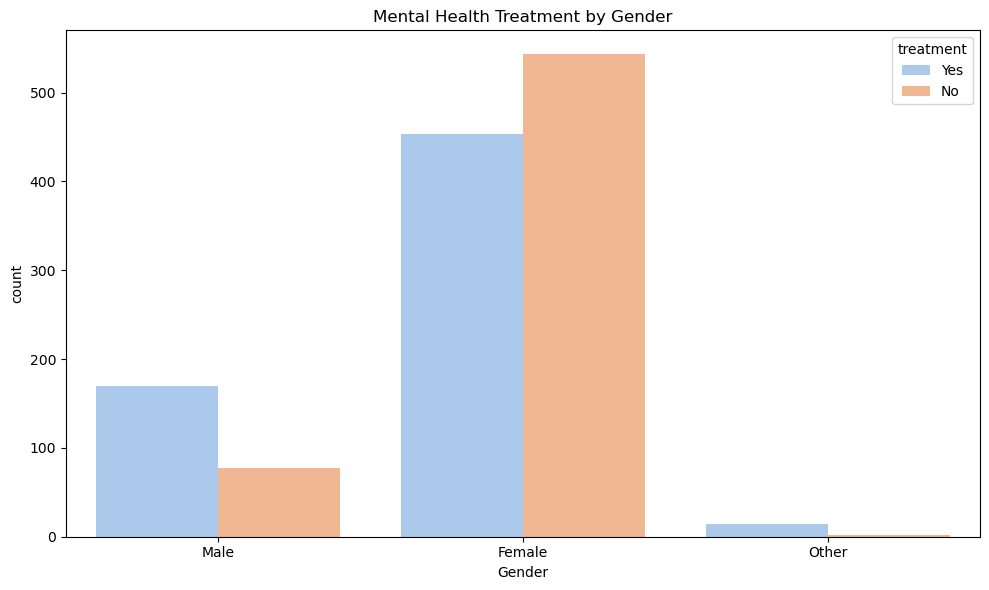

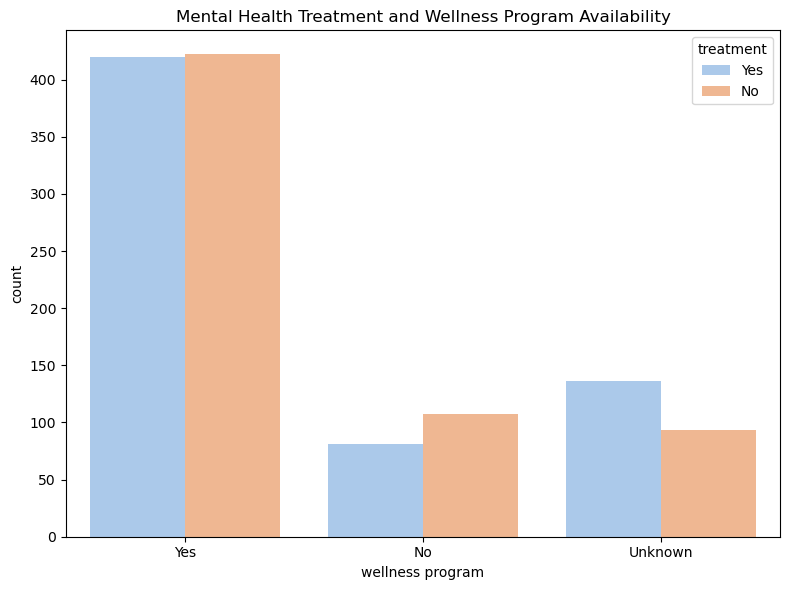

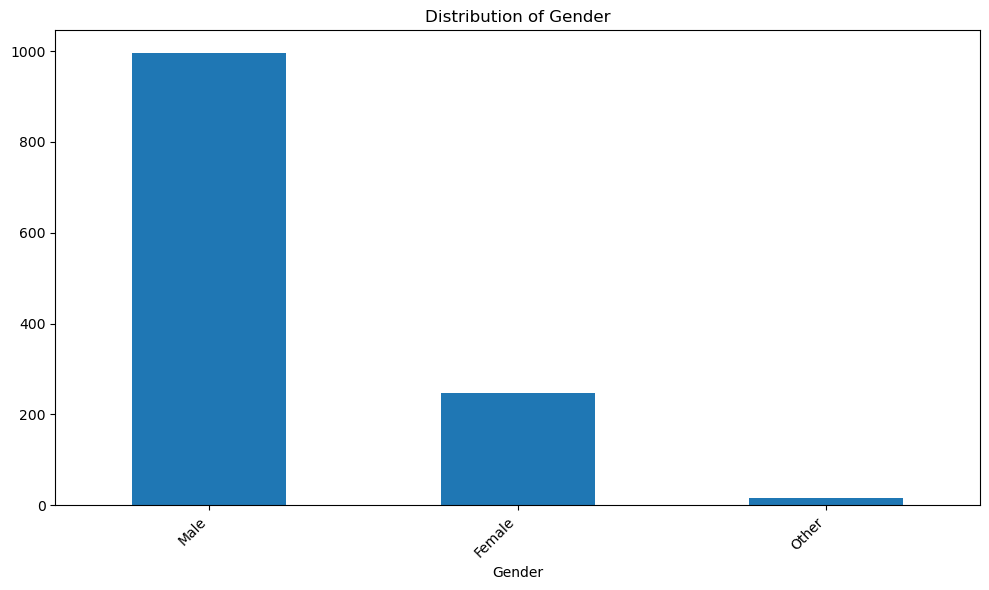

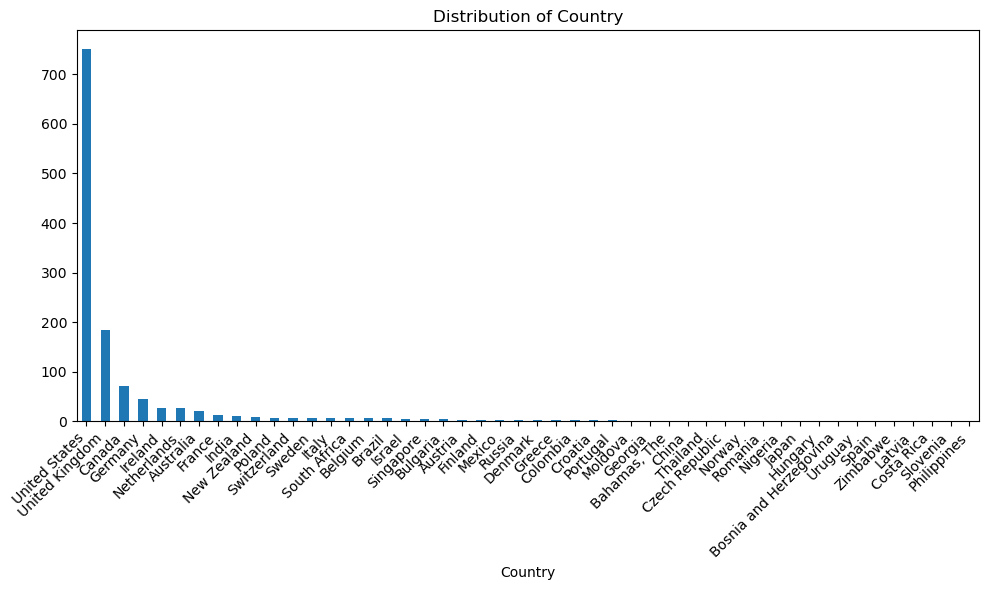

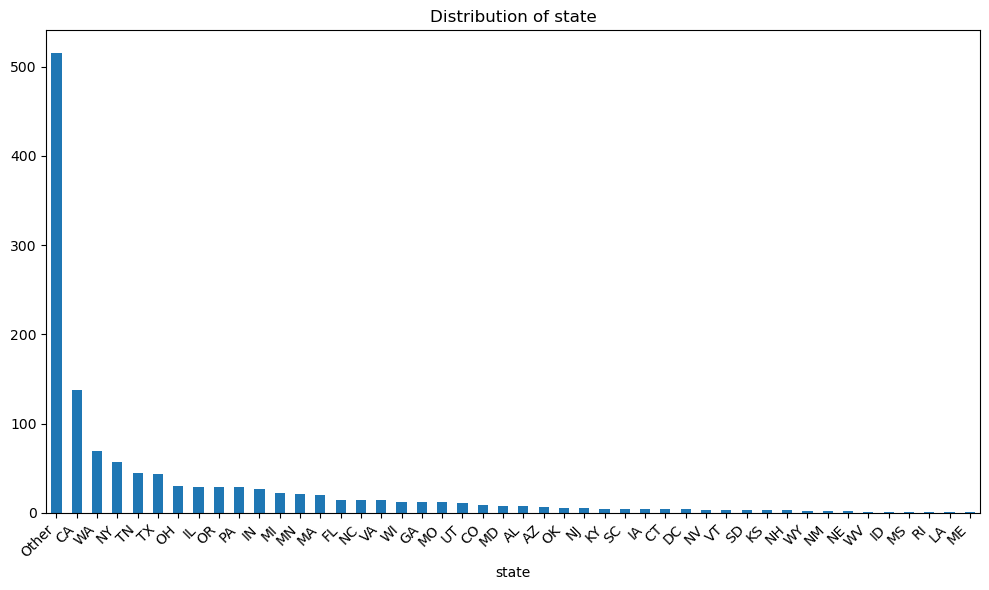

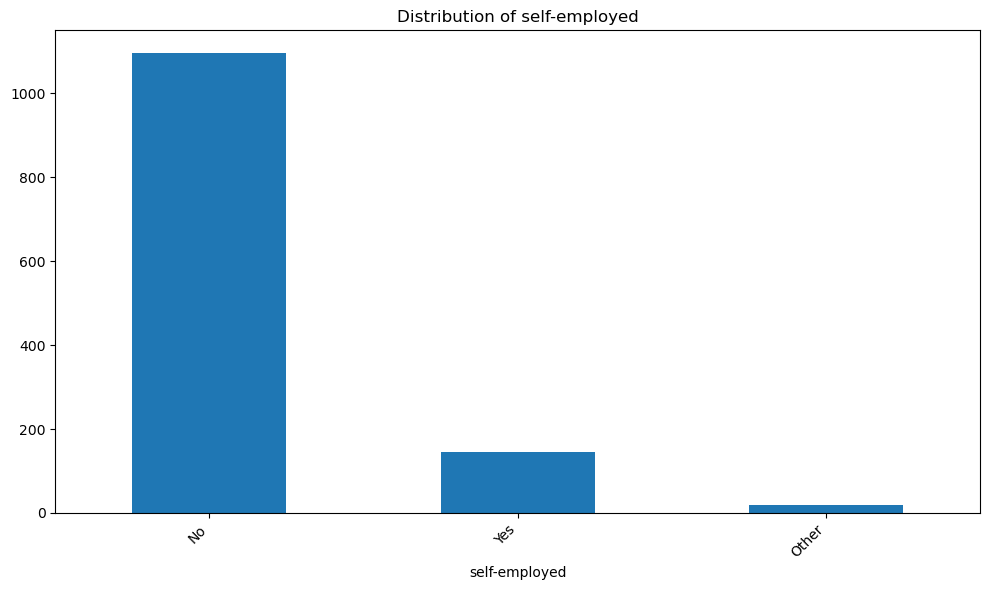

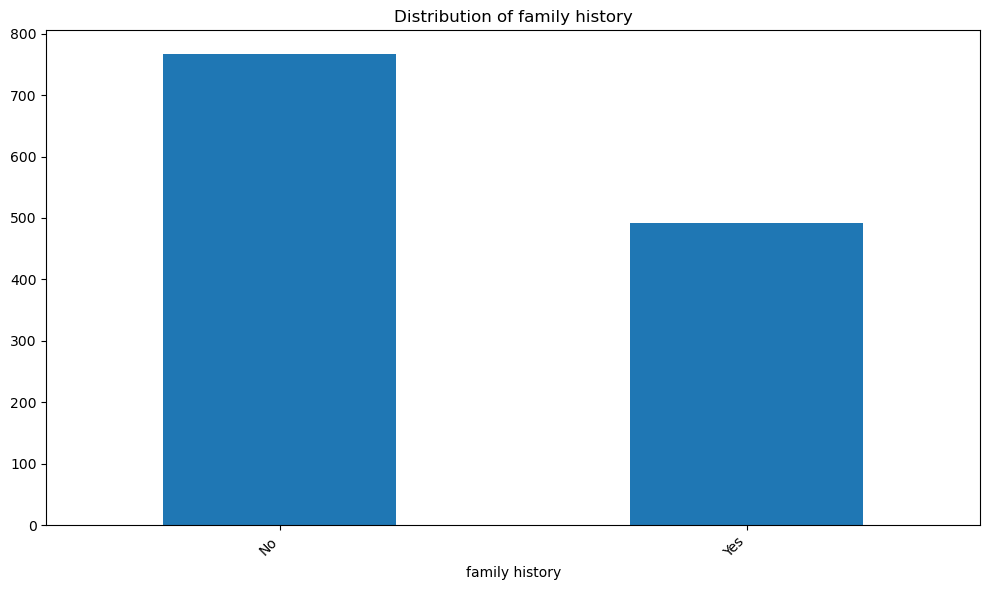

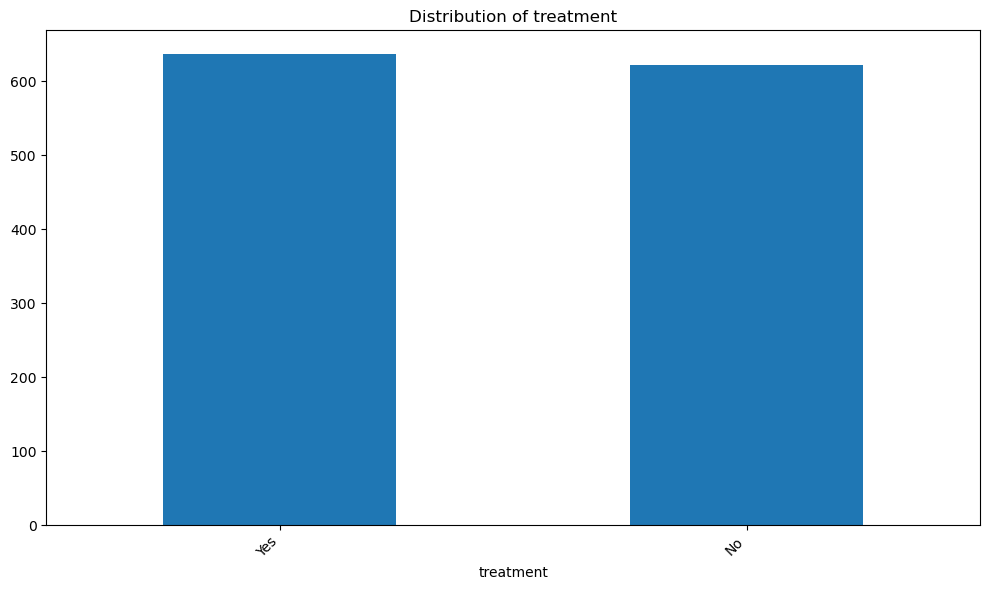

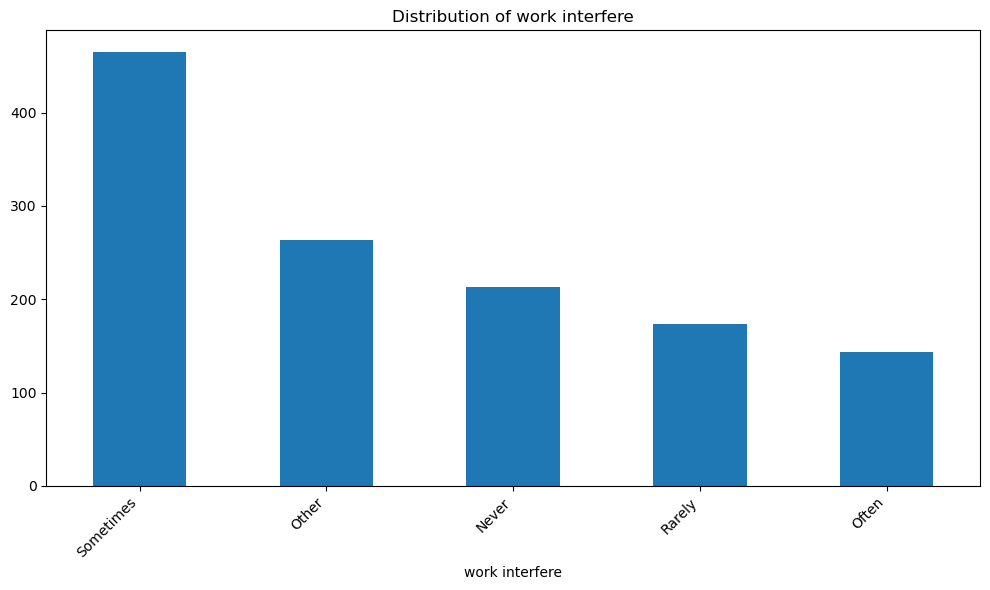

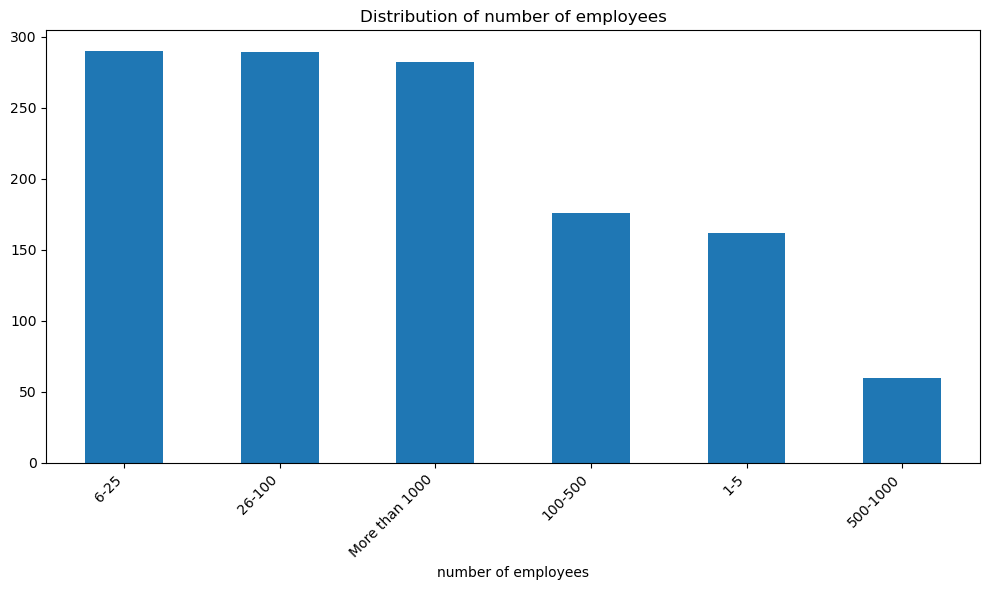

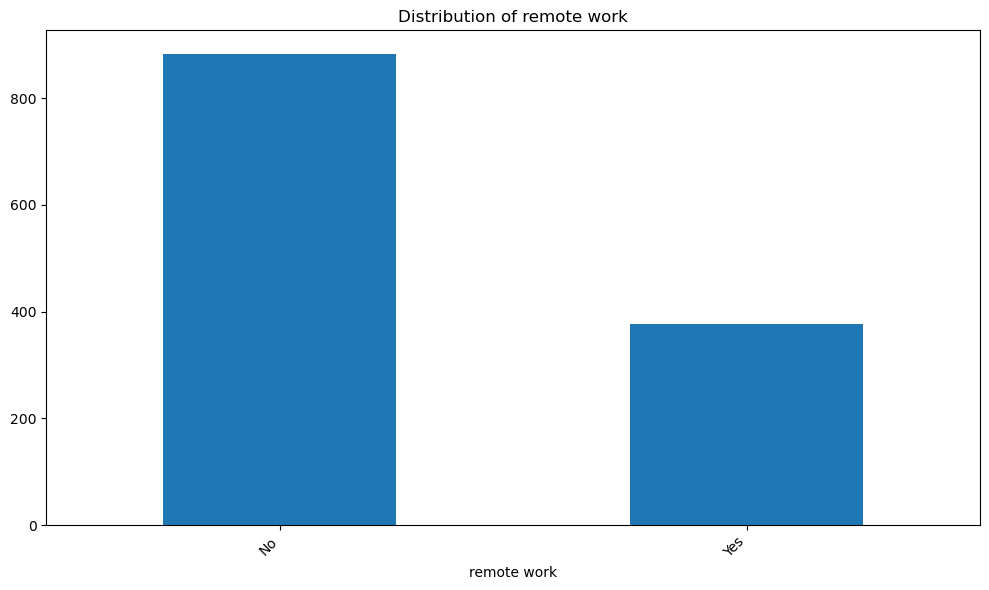

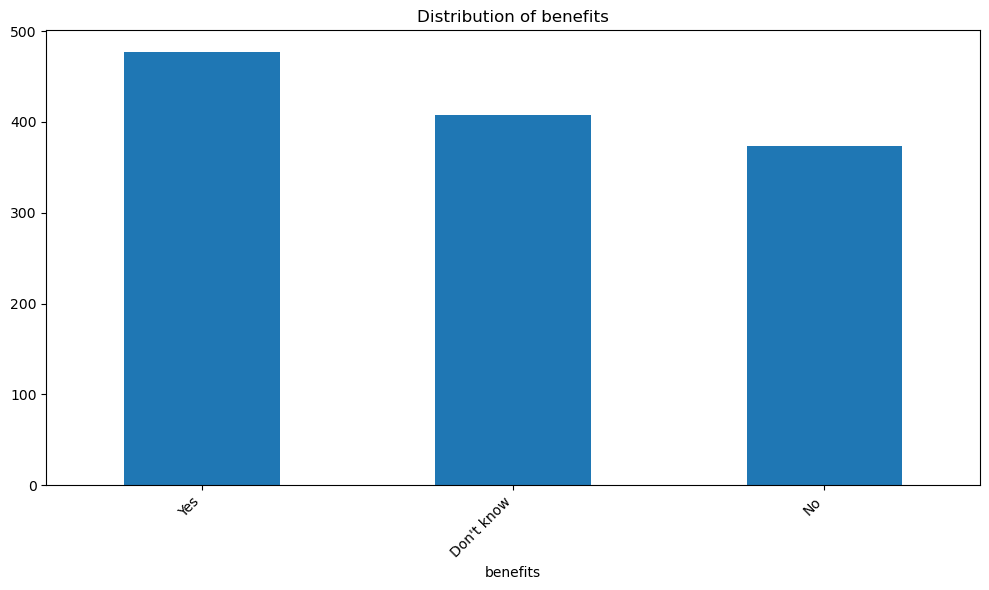

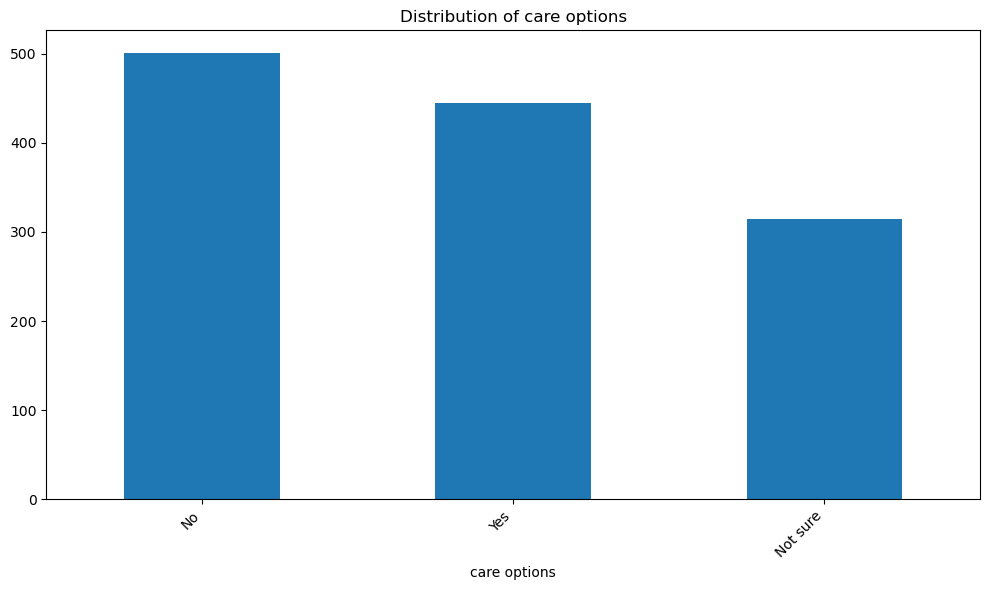

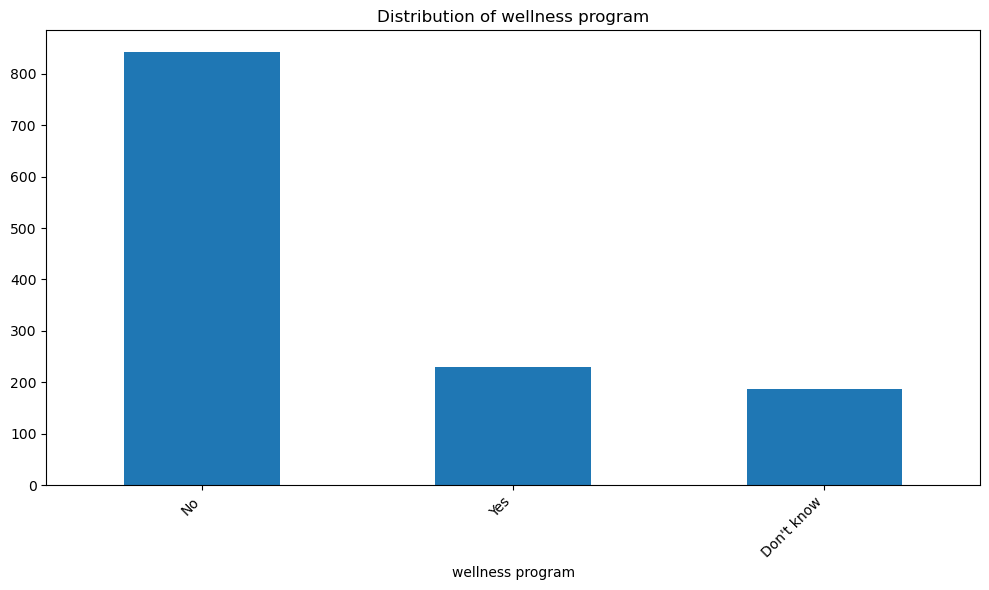

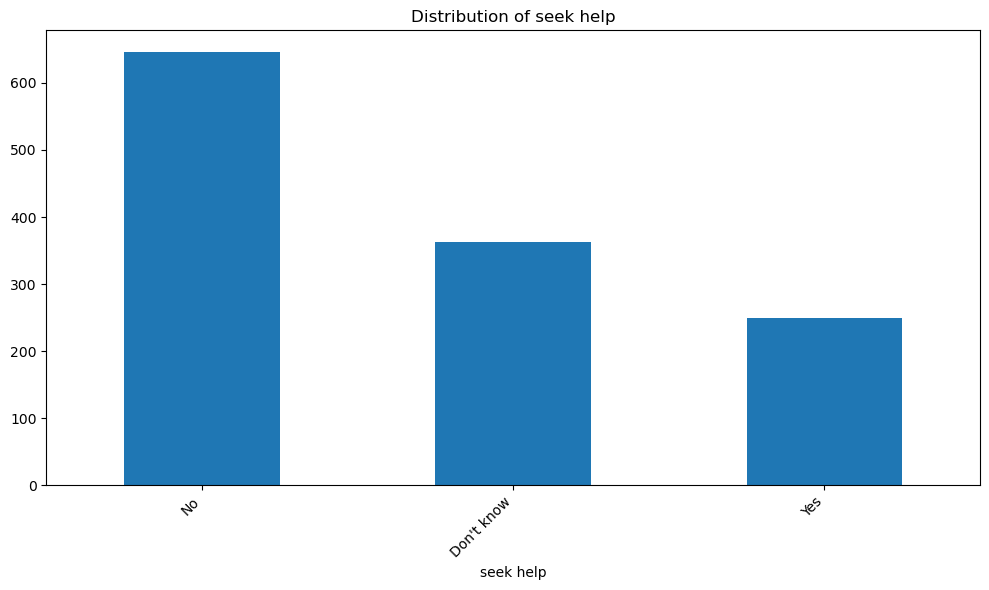

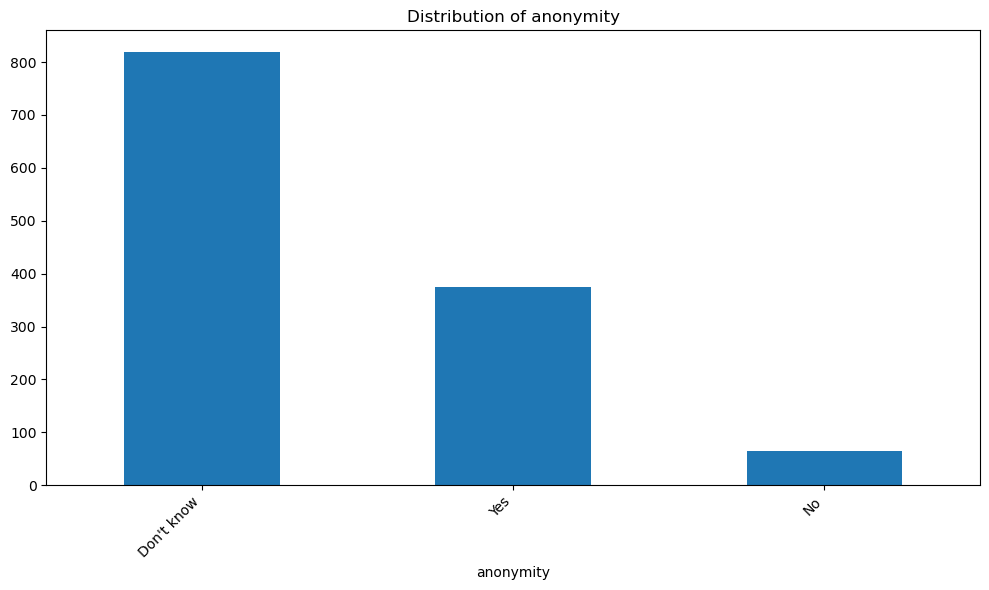

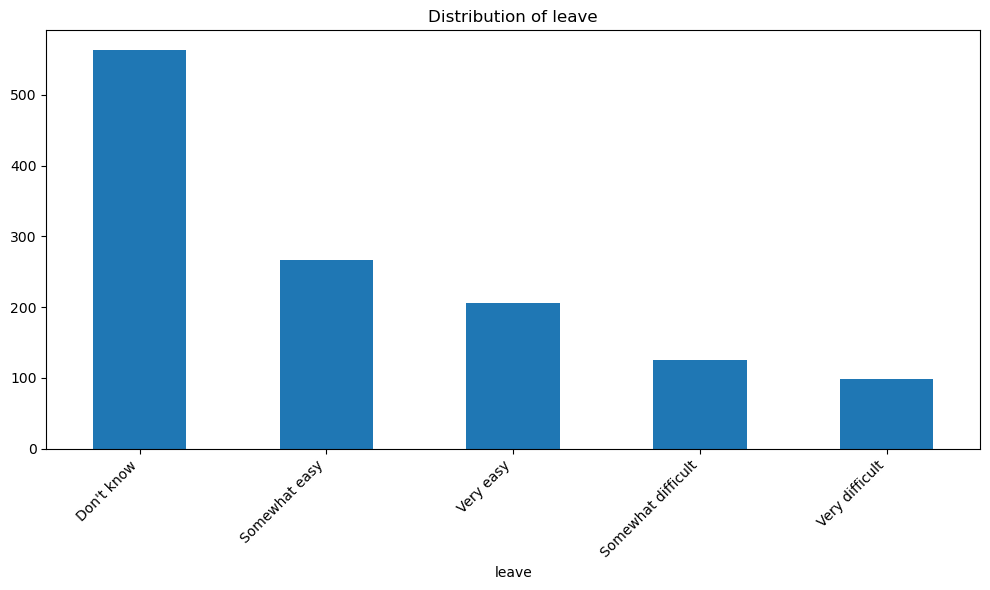

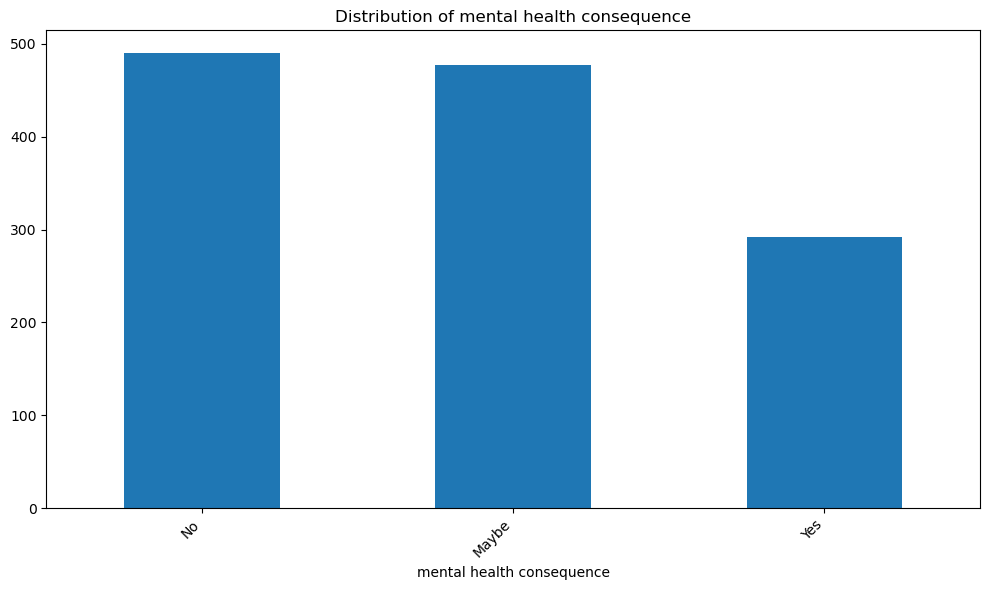

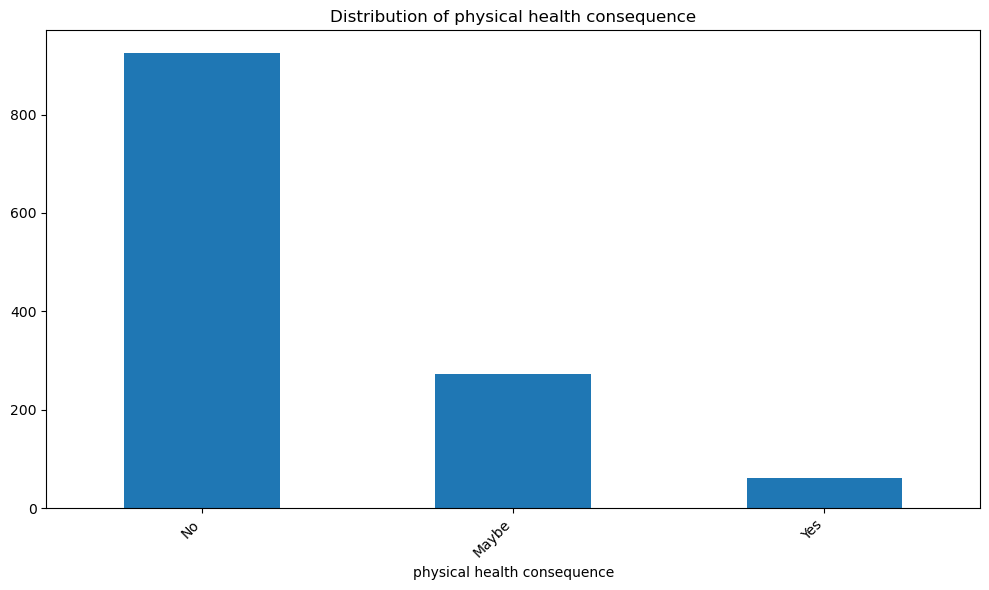

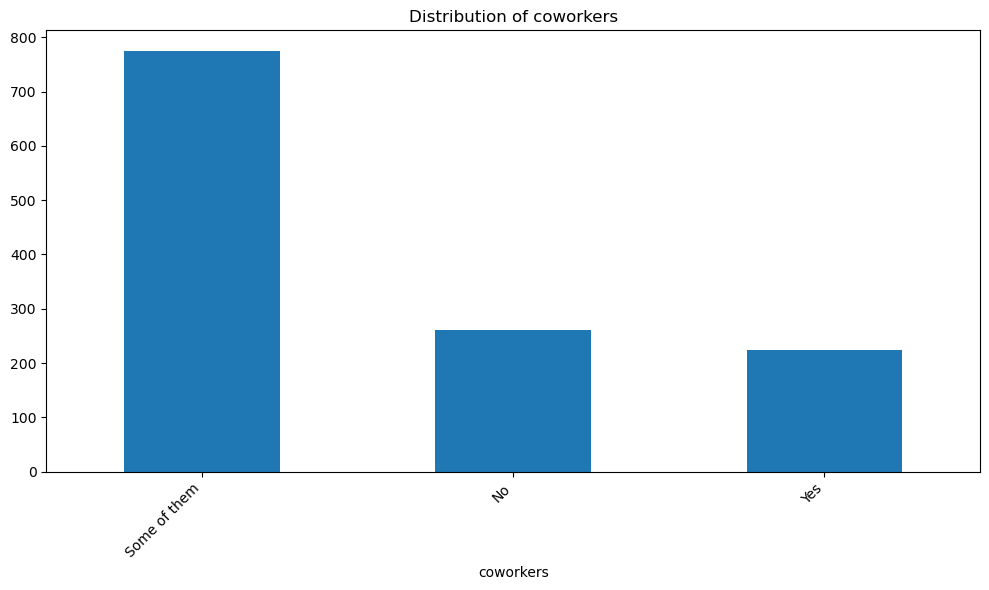

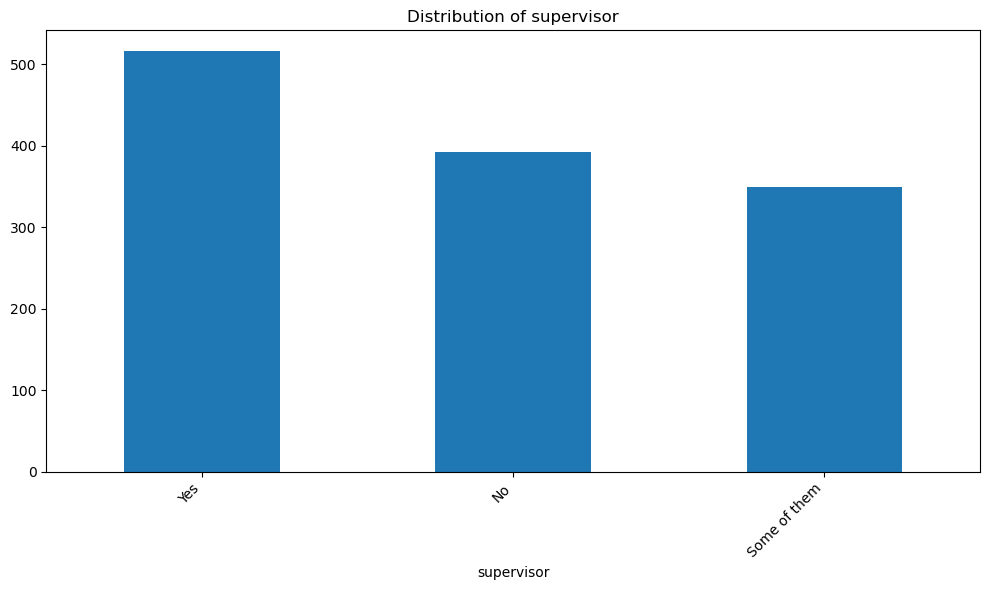

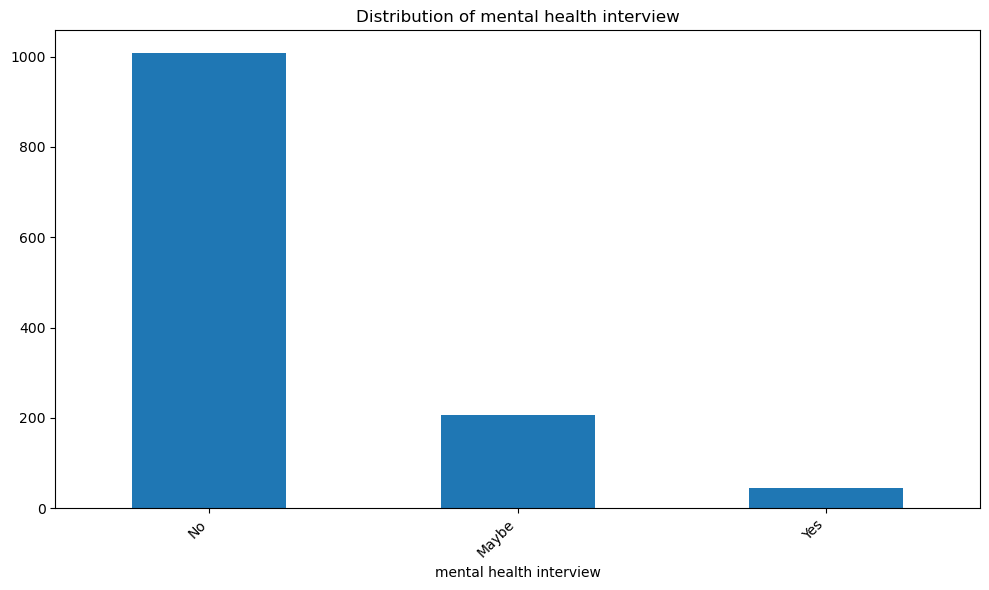

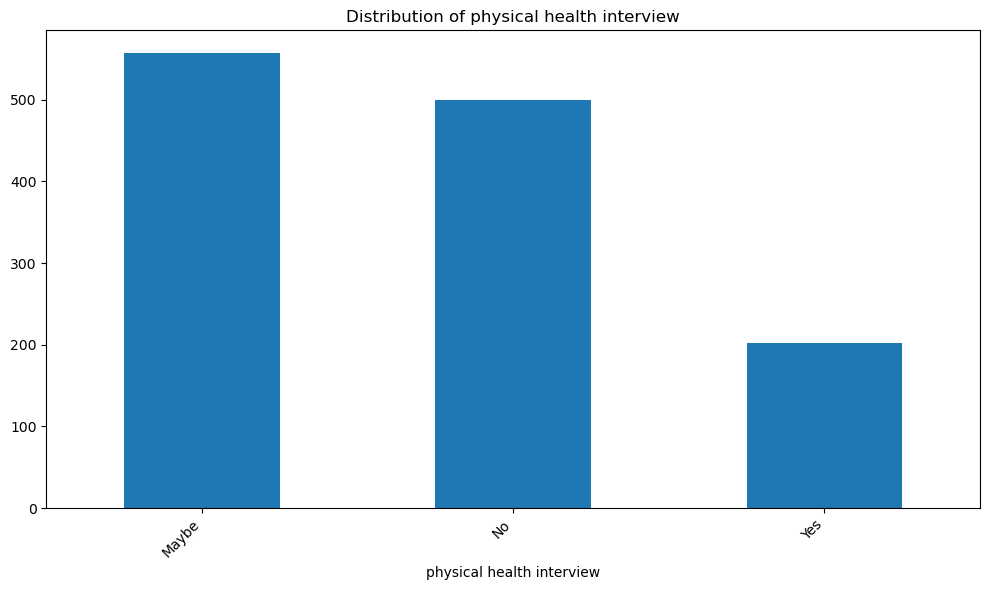

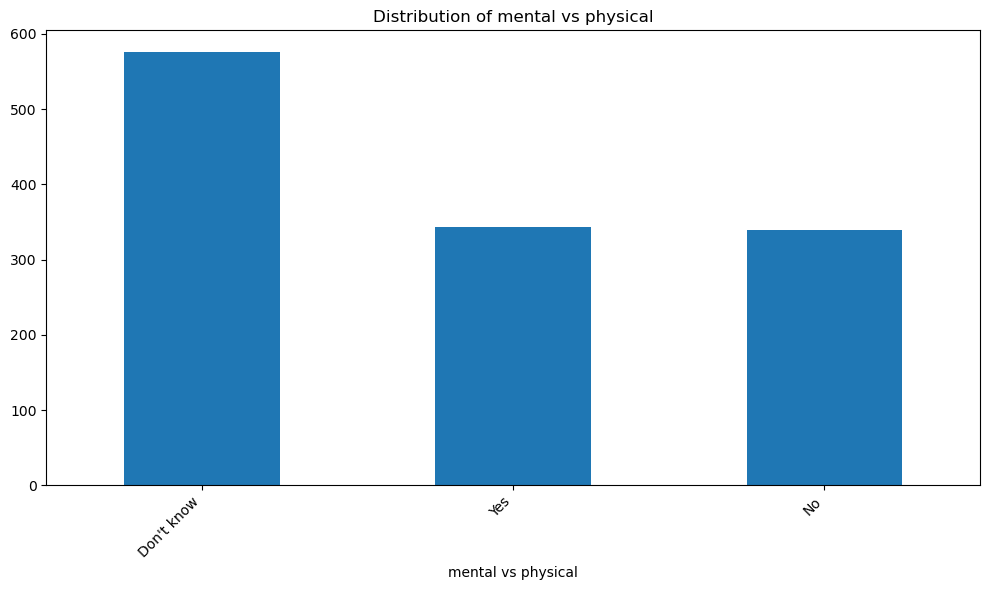

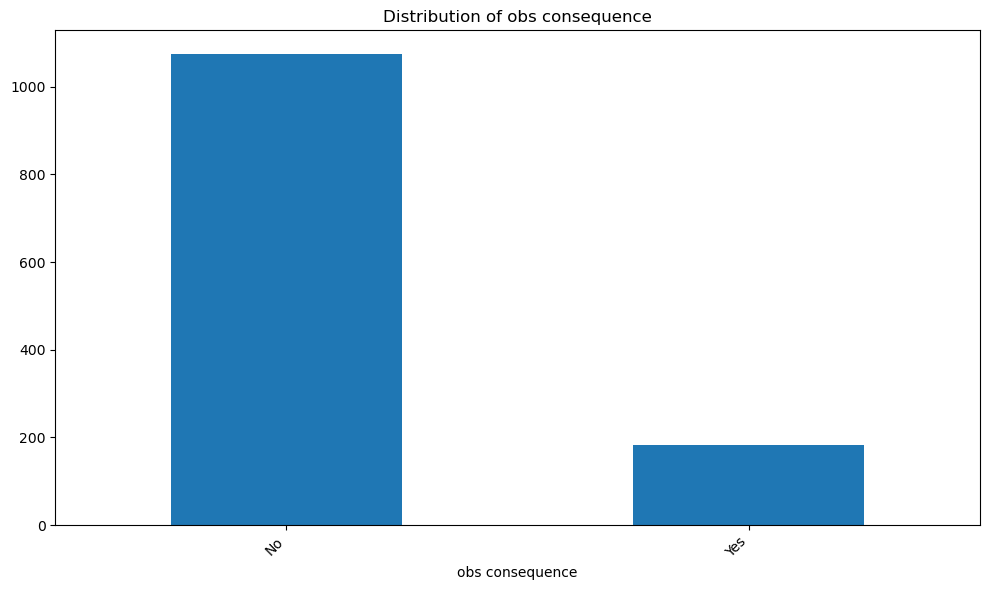

(1259, 138)
 Gender_Male: 0.952859
 Gender_Other: 6.454435
 Country_Austria: 0.905895
 Country_Bahamas, The: 3.311644
 Country_Belgium: 0.346335
 Country_Bosnia and Herzegovina: 0.301965
 Country_Brazil: 1.811789
 Country_Bulgaria: 0.007332
 Country_Canada: 0.038091
 Country_China: 0.301965
 Country_Colombia: 0.806804
 Country_Costa Rica: 0.301965
 Country_Croatia: 0.806804
 Country_Czech Republic: 0.301965
 Country_Denmark: 0.603930
 Country_Finland: 3.182847
 Country_France: 1.753429
 Country_Georgia: 3.311644
 Country_Germany: 3.687441
 Country_Greece: 6.623288
 Country_Hungary: 3.311644
 Country_India: 1.585704
 Country_Ireland: 4.667108
 Country_Israel: 0.028616
 Country_Italy: 0.311768
 Country_Japan: 3.311644
 Country_Latvia: 0.301965
 Country_Mexico: 0.905895
 Country_Moldova: 0.301965
 Country_Netherlands: 1.063915
 Country_New Zealand: 3.227217
 Country_Nigeria: 0.301965
 Country_Norway: 0.301965
 Country_Philippines: 3.311644
 Country_Poland: 2.113754
 Country_Portugal: 0.80

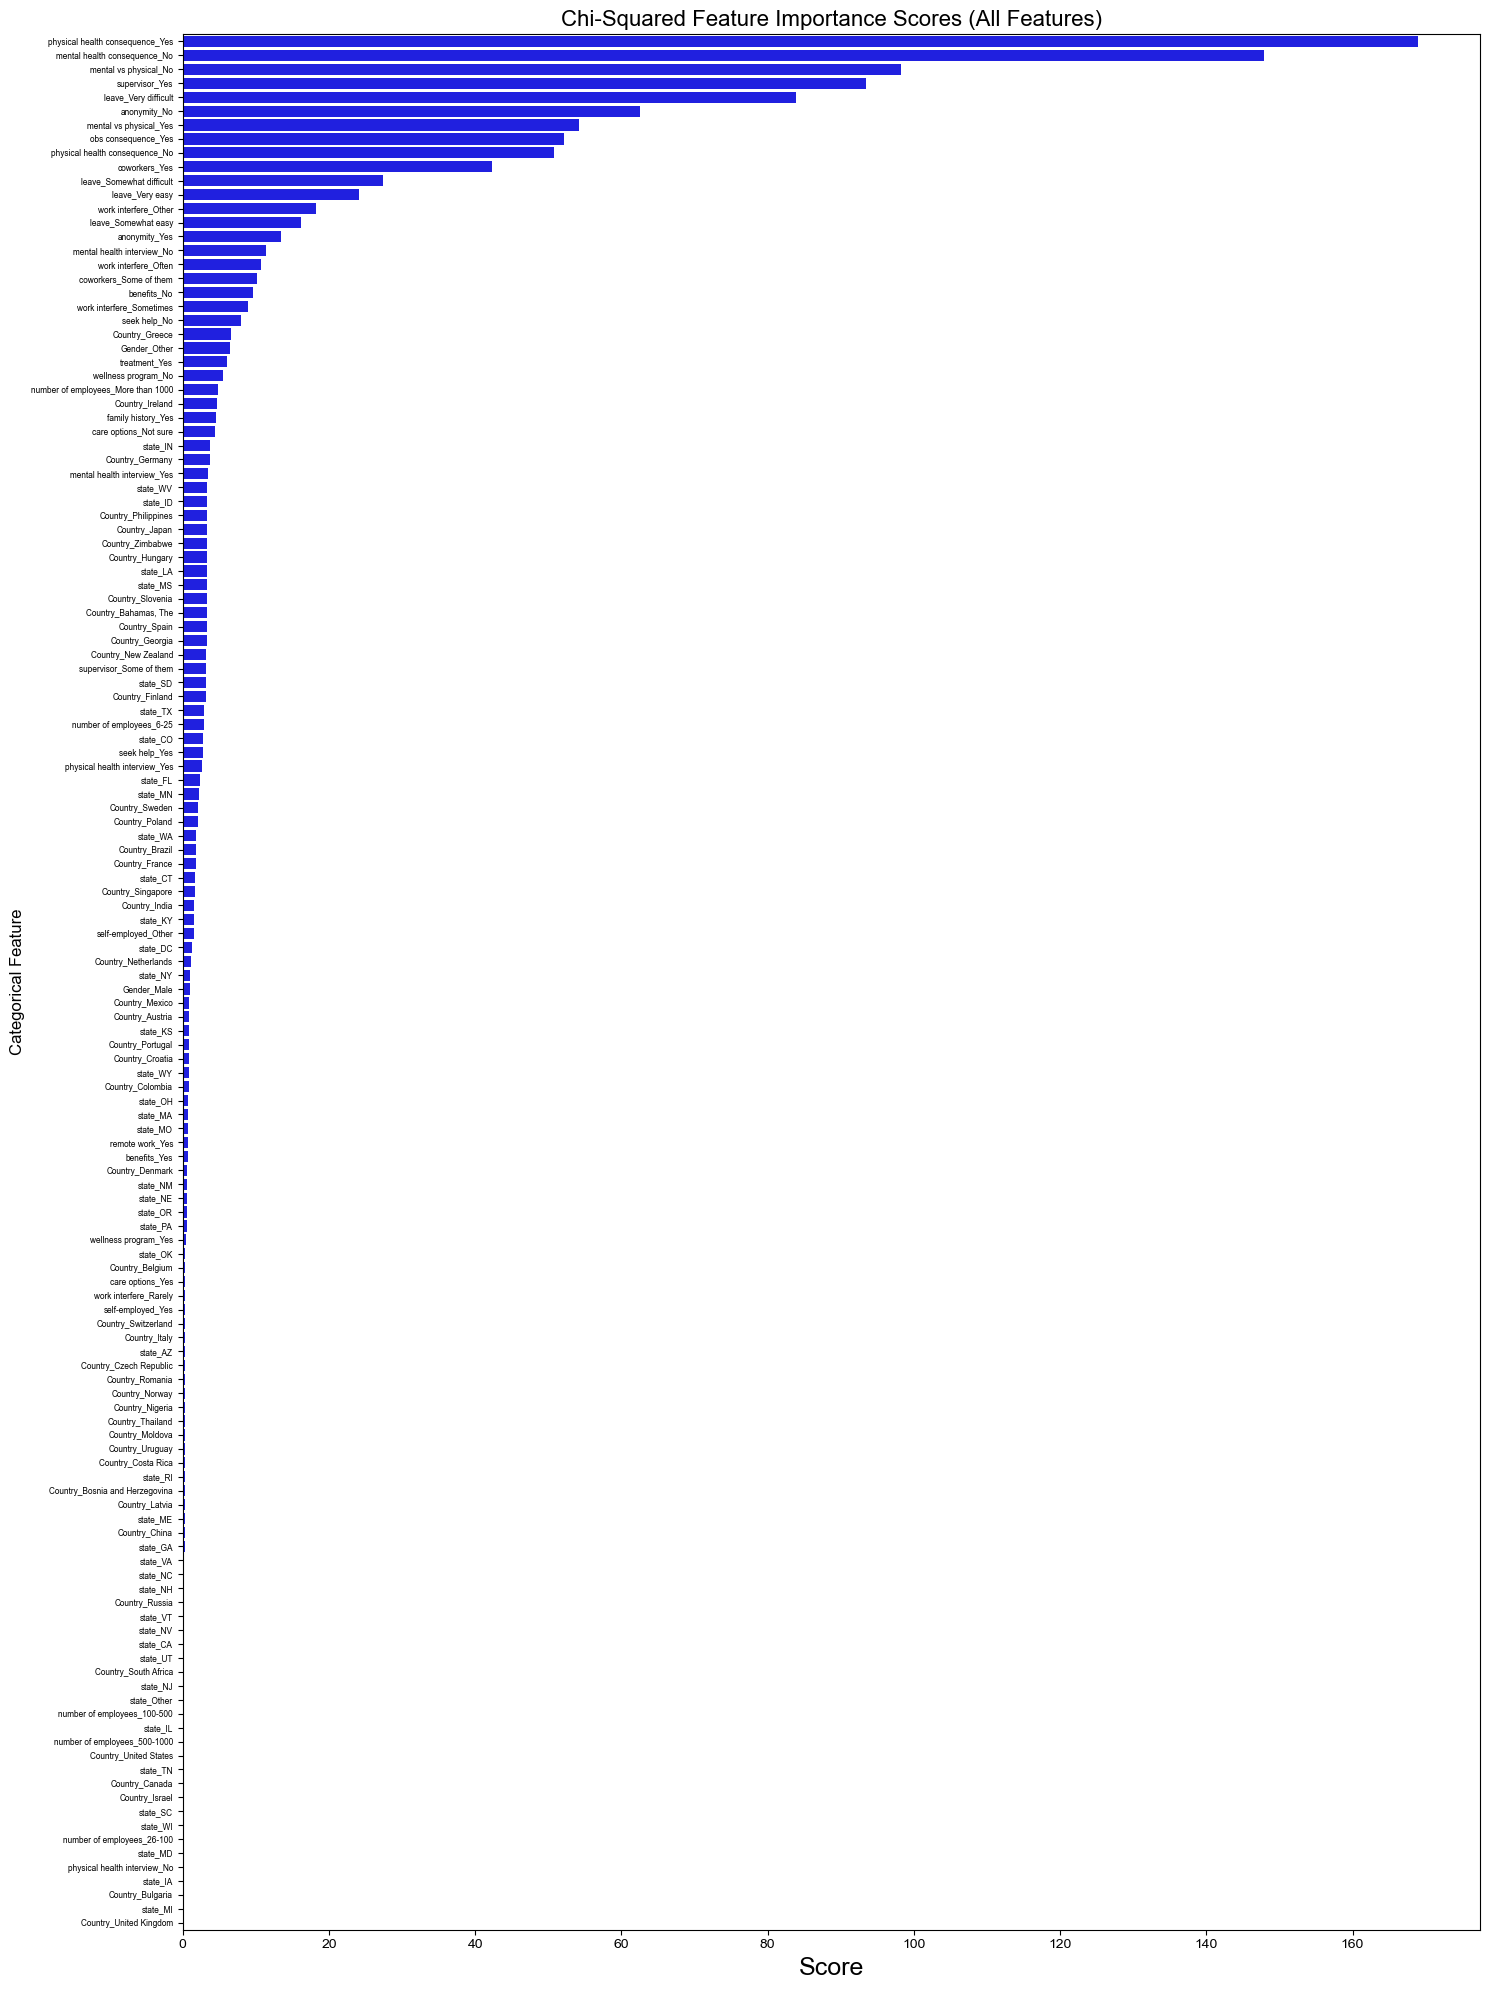

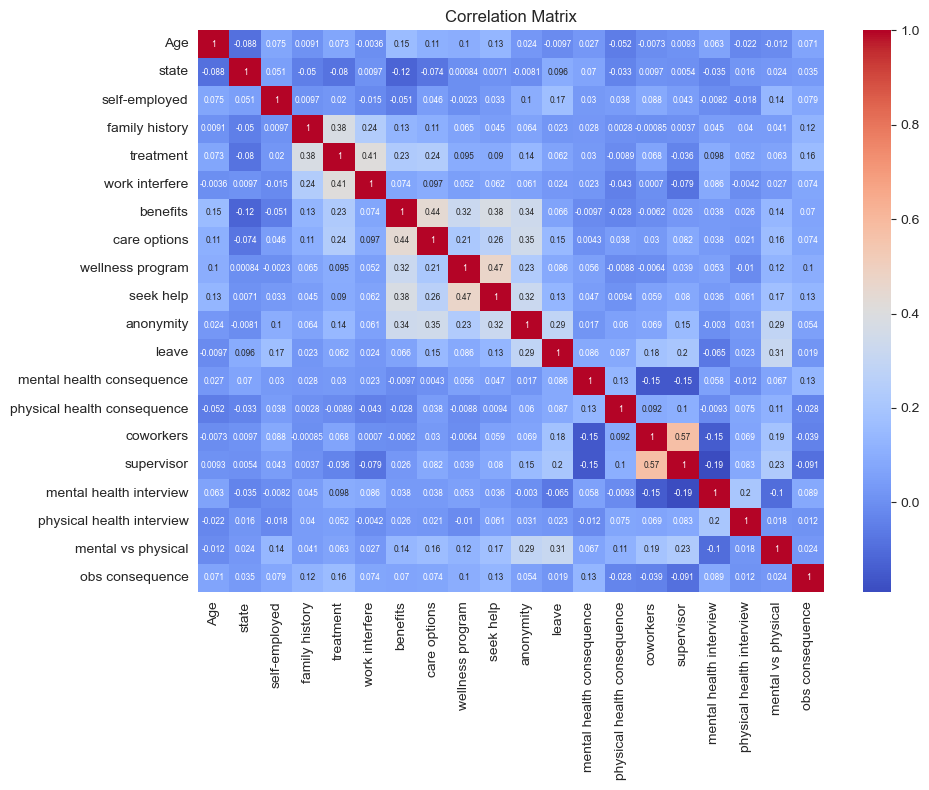

Optimization terminated successfully.
         Current function value: 0.579822
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:              treatment   No. Observations:                 1259
Model:                          Logit   Df Residuals:                     1255
Method:                           MLE   Df Model:                            3
Date:                Thu, 07 Nov 2024   Pseudo R-squ.:                  0.1634
Time:                        22:18:55   Log-Likelihood:                -730.00
converged:                       True   LL-Null:                       -872.58
Covariance Type:            nonrobust   LLR p-value:                 1.608e-61
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -2.5949      0.322     -8.067      0.000      -3.225      -1.964
Age              

In [1]:
# Dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import LabelEncoder
import plotly.express as px  # For interactive map

data_frames = []

data_paths = [
r'C:\Users\asg_a_1p8y6mm\OneDrive\Desktop\WIOA Training\DataAnalytics\Module 7\Module 7; Class Project\Data Cleaning 2014\survey.csv'
]

col_renames = {
       'Age':'Age', 'Gender':'Gender', 'Country':'Country', 'state':'state', 'self_employed':'self-employed',
       'family_history':'family history', 'treatment':'treatment', 'work_interfere':'work interfere', 'no_employees':'number of employees',
       'remote_work':'remote work', 'tech_company':'tech company', 'benefits':'benefits', 'care_options':'care options',
       'wellness_program':'wellness program', 'seek_help':'seek help', 'anonymity':'anonymity', 'leave':'leave',
       'mental_health_consequence':'mental health consequence', 'phys_health_consequence':'physical health consequence', 'coworkers':'coworkers',
       'supervisor':'supervisor', 'mental_health_interview':'mental health interview', 'phys_health_interview':'physical health interview',
       'mental_vs_physical':'mental vs physical', 'obs_consequence':'obs consequence',
}

col_to_keep = col_renames.keys()

for path in data_paths:
  print("\nReading file: ", path)
  df = pd.read_csv(path)
  print('Shape - default: ', df.shape)

  # We have a lot of columns and many with a lot of missing values. let's filter those columns and keep only those who have less than 90% missing values.
  max_na_filter = (0.9 * len(df))
  df = df.loc[:,(df.isnull().sum(axis = 0) <= max_na_filter)]
  print('Shape - filtered: ', df.shape)

  # Removing not needed columns
  col_to_drop = [item for item in df.columns if item not in col_to_keep]
  df.drop(columns = col_to_drop, inplace = True, errors = 'ignore')
  print('Shape - column filtered: ', df.shape)

  # Renaming columns
  df.rename(columns = col_renames, inplace = True) 

  # Storing data frames in list
  data_frames.append(df)

data_df = pd.concat(data_frames, ignore_index = True)
print('Shape - combined data: ', data_df.shape)
print('Shape - combined data: ', df.shape)

print(data_df.head(10))

# lets check number of empty rows in data
print(data_df.isna().sum().sort_values())

#### Data Cleaning and Preprocessing

# Focus on tech-related employees 
# Since we are targetting tech related employees, setting default input values will make incorrect analysis, 
# hence removing the empty value rows 
# data_df = data_df[data_df['tech company'].notna()]
data_df.dropna(subset=['tech company'], inplace=True)
# Lets see the values in our interested column
# print(data_df['tech company'].value_counts())
print(data_df.value_counts(subset=['tech company']))
# Lets remove those records who do not have tech related job
data_df.drop(data_df[data_df['tech company'] == 0.0].index, inplace = True)
# now since all of our data contains records who have tech related job, we can safely remove the column
data_df.drop(columns = 'tech company', inplace = True)
df = data_df
print(df.head())

# Handle missing values strategically
#df['self-employed'].fillna('Other', inplace=True)
df.fillna({'self-employed':'Other'}, inplace=True)
#df['state'].fillna('Other', inplace=True)
df.fillna({'state':'Other'}, inplace=True)
#df['work interfere'].fillna('Other', inplace=True)
df.fillna({'work interfere':'Other'}, inplace=True)

# Handle Age outliers
# lets see what values we have
print(data_df['Age'].describe().astype(int))
# We can see irregularites in age, lets try to address these
df['Age'] = df['Age'].astype(float)
mean_age = df[(df['Age'] >= 18) & (df['Age'] <= 75)]['Age'].mean()
df.loc[(df['Age'] < 18) | (df['Age'] > 75), 'Age'] = mean_age
print(data_df['Age'].describe().astype(int))

#### Standardize Categorical Features

# Standardize Gender
# a lot of inconsistent records exists in our gender, lets break all these in our required groups.
gender_male = ['male', 'M', 'Make', 'Male ', 'Man', 'Cis Male', 'msle', 'male leaning androgynous', 'Mail', 'Malr', 'Cis Man', 'Guy (-ish) ^_^', 'ostensibly male, unsure what that really means', 'Male (CIS)', 'Mal', 'maile', 'Male-ish', 'Androgyne', 'something kinda male?', 'm', 'man', 'male/he/him', 'let\'s keep it simple and say \"male\"', 'mostly male', 'masculine', 'identify as male', 'masculino', 'cishet male', 'cis male', 'mail', 'male-ish', 'cis-male', 'male (cis)', 'cis hetero male', 'dude', 'cisgender male', 'male, born with xy chromosoms', 'swm', 'ostensibly male']
gender_female = ['female', 'f', 'F', 'woman', 'Woman', 'Female ', 'Female (cis)', 'cis-female/femme', 'Femake', 'Cis Female', 'female, she/her', 'femile', 'female (cis)', 'f, cisgender', 'cisgendered woman', 'femmina', 'cis female', 'cis woman', 'cis-female', 'genderqueer demigirl', 'female (cisgender)', 'my sex is female.', 'femail', 'femalw', 'nonbinary/femme', 'cisgender female', 'she/her/they/them', '*shrug emoji* (f)',  'female/gender non-binary.', 'i identify as female']
gender_other = ['agender', 'Female (trans)', 'Genderqueer', 'A little about you', 'queer', 'Neuter', 'Trans woman', 'Agender', 'fluid', 'Enby', 'All', 'Nah', 'queer/she/they', 'Trans-female', 'p', 'nonbinary', 'nb', 'b', 'gender non-conforming woman', 'demiguy', 'trans non-binary/genderfluid', 'other', 'afab non-binary', 'sometimes', 'questioning', 'none', 'trans man', 'trans woman', 'trans female', 'non-binary/agender', 'make', 'agender trans woman', 'transfeminine', 'genderqueer/non-binary', 'non binary', 'contextual', 'agender/genderfluid', 'non-binary', 'genderfluid', 'god king of the valajar', 'uhhhhhhhhh fem genderqueer?', 'transgender', 'genderqueer', 'homem cis']
# lets transfor gender in simpler form
data_df['Gender'] = data_df['Gender'].replace(gender_male, 'Male')
data_df['Gender'] = data_df['Gender'].replace(gender_female, 'Female')
data_df['Gender'] = data_df['Gender'].replace(gender_other, 'Other')
# lets check records now
print(data_df['Gender'].value_counts())

# lets check number of empty rows in data again
data_df.isna().sum().sort_values()

# Standardize Benefits
# lets check number of empty rows in data again
print(data_df.isna().sum().sort_values())
# we dont have any missing rows now, lets first see what are different values present
print(data_df['benefits'].value_counts())
# Not eligible for coverage / NA is same as No. Lets update
data_df.loc[data_df['benefits'] == 'Not eligible for coverage / NA' , 'benefits'] = 'No'
print(data_df['benefits'].value_counts())

#### Feature Reduction
# Lets see our unique data types
print(data_df.nunique())
print(data_df.info())
# Now all missing data is fixed.
# Lets see our total records now
print(data_df.shape)

##### Descriptive Statistics and Visualizations

colors = sns.color_palette('pastel')[0:5]

# age
# lets see what values we have
print(data_df['Age'].describe())

# Proportions of Gender in tech industry
#data_df.groupby(['Gender']).size().plot(kind = 'pie', autopct = '%1.1f%%', label = 'Proportions of Gender in tech industry', colors = colors)
data_df.groupby(['Gender']).size().plot(kind='pie', autopct='%1.1f%%', colors=colors, title='Proportions of Gender in tech industry')

male_with_mental_health = data_df[(data_df["mental health consequence"] == 'Yes') & (data_df["Gender"] == 'Male')]
female_with_mental_health = data_df[(data_df["mental health consequence"] == 'Yes') & (data_df["Gender"] == 'Female')]
other_with_mental_health = data_df[(data_df["mental health consequence"] == 'Yes') & (data_df["Gender"] == 'Other')]

sizes = [
    len(male_with_mental_health),
    len(female_with_mental_health),
    len(other_with_mental_health)
]
labels = ['Male', 'Female', 'Other']
colors = ['skyblue', 'lightcoral', 'gold'] # Define your colors

fig1, ax1 = plt.subplots()
fig1.suptitle('Gender w.r.t having mental health consequence', fontsize=16)
ax1.pie(x=sizes, labels=labels, autopct='%1.1f%%', colors=colors)  # Use x=sizes
plt.show()
plt.close()

#### Mental health consequence distribution by age and gender
print(data_df['mental health consequence'].describe())
#data_df.groupby(['mental health consequence']).size().plot(kind='pie', autopct='%1.0f%%', label='Have mental health issues?', colors = colors)
data_df.groupby(['mental health consequence']).size().plot(kind='pie', autopct='%1.0f%%', colors = colors, title='Have mental health issues?')

# It can be seen as mostly say Yes and mostly are Men in their 30s in our data. So lets plot them together to further analyze
g = sns.FacetGrid(data_df, row='Gender', col='mental health consequence', height=4)
g.map(plt.hist, 'Age', bins=range(0, 101, 10)) # Bins from 0 to 100 with a width of 10
g.set(xlim=(0, 100))  # Set x-axis limits
g.add_legend()
plt.show()
plt.close()

#### Are companies taking Mental Health issues seriously?
#data_df.groupby(['benefits']).size().plot(kind = 'pie', autopct = '%1.1f%%', label = 'MH Coverage Provided? ', colors = colors)
data_df.groupby(['benefits']).size().plot(kind = 'pie', autopct = '%1.1f%%', colors = colors, title = 'MH Coverage Provided? ')
plt.close()

#data_df.groupby(['care options']).size().plot(kind = 'pie', autopct = '%1.1f%%', label = 'MH Resources Provided? ', colors = colors)
data_df.groupby(['care options']).size().plot(kind = 'pie', autopct = '%1.1f%%', colors = colors, title = 'MH Resources Provided? ')
plt.close()

# How easy is discussing Mental Health at Work?
#data_df.groupby(['supervisor']).size().plot(kind = 'pie', autopct = '%1.1f%%', label = 'Discuss MH with Employer? ', colors = colors)
data_df.groupby(['supervisor']).size().plot(kind = 'pie', autopct = '%1.1f%%', colors = colors, title = 'Discuss MH with Employer? ')
plt.close()

male_has_mh_and_not_discussed = data_df[(data_df["mental health consequence"] == 'Yes') & (data_df["Gender"] == 'Male') & (data_df["supervisor"] == 'No')]
female_has_mh_and_not_discussed = data_df[(data_df["mental health consequence"] =='Yes') & (data_df["Gender"] == 'Female') & (data_df["supervisor"] == 'No')]
other_has_mh_and_not_discussed = data_df[(data_df["mental health consequence"] =='Yes') & (data_df["Gender"] == 'Other') & (data_df["supervisor"] == 'No')]

sizes = [
    len(male_has_mh_and_not_discussed),
    len(female_has_mh_and_not_discussed),
    len(other_has_mh_and_not_discussed)
]
labels = ['Male', 'Female', 'Other']
colors = ['skyblue', 'lightcoral', 'gold'] # Define colors

fig1, ax1 = plt.subplots()
fig1.suptitle('Gender w.r.t having MH and not discuss with employer', fontsize=16)
ax1.pie(x=sizes, labels=labels, autopct='%1.1f%%', colors=colors) # Use x=sizes
plt.show()
plt.close()

#data_df.groupby(['coworkers']).size().plot(kind = 'pie', autopct = '%1.1f%%', label = 'Discuss MH with Co-workers?? ', colors = colors)
data_df.groupby(['coworkers']).size().plot(kind = 'pie', autopct = '%1.1f%%', colors = colors, title = 'Discuss MH with Co-workers?? ')
plt.close()

male_discussed_with_coworkers = data_df[(data_df["mental health consequence"] == 'Yes') & (data_df["Gender"] == 'Male') & (data_df["coworkers"] == 'Yes')]
female_discussed_with_coworkers = data_df[(data_df["mental health consequence"] == 'Yes') & (data_df["Gender"] == 'Female') & (data_df["coworkers"] == 'Yes')]
other_discussed_with_coworkers = data_df[(data_df["mental health consequence"] == 'Yes') & (data_df["Gender"] == 'Other') & (data_df["coworkers"] == 'Yes')]


sizes = [
    len(male_discussed_with_coworkers),
    len(female_discussed_with_coworkers),
    len(other_discussed_with_coworkers)
]
labels = ['Male', 'Female', 'Other']
colors = ['skyblue', 'lightcoral', 'gold']  # Define your colors


fig1, ax1 = plt.subplots()
fig1.suptitle('Gender w.r.t having MH and discuss with co-worker', fontsize=16)
ax1.pie(x=sizes, labels=labels, autopct='%1.1f%%', colors=colors) # x=sizes
plt.show()
plt.close()

g = sns.FacetGrid(data_df, row = 'supervisor', col = 'coworkers', height = 6)
g.map(plt.hist, 'mental health consequence', bins = 8, alpha = 0.6)
g.add_legend()
plt.show()
plt.close()

# Seek Help?
plt.hist(data_df['seek help'], bins=24, color = "skyblue")
plt.show()
plt.close()

# Relationship between Demographics/Work Factors and Mental Health
plt.figure(figsize=(10, 6))
sns.countplot(x="Gender", hue="treatment", data=data_df, palette="pastel")
# Set ticks and labels using plt.xticks() after the Seaborn plot
plt.xticks([0, 1, 2], ["Male", "Female", "Other"])
plt.title("Mental Health Treatment by Gender")
plt.tight_layout()
plt.show()
plt.close()

# Wellness Program Effectiveness
plt.figure(figsize=(8, 6))
sns.countplot(x='wellness program', hue='treatment', data=data_df, palette="pastel") 
plt.xticks([0, 1, 2], ["Yes", "No", "Unknown"])
plt.title("Mental Health Treatment and Wellness Program Availability")
plt.tight_layout()
plt.show()
plt.close()

# Distributions for all features
for col in data_df.columns: # Loop through all columns
    if data_df[col].dtype == 'object': # Categorical features
        plt.figure(figsize=(10, 6))
        data_df[col].value_counts().plot(kind='bar', rot=45)
        plt.title(f'Distribution of {col}')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
        plt.close()


### Predictions
data2 = pd.get_dummies(data_df, drop_first=True)
print(data2.shape)
data2.columns

X = data2.drop(['mental health consequence_Yes', 'Age'], axis=1)
y = data2['mental health consequence_Yes']

#Categorical feature selection
from sklearn.feature_selection import SelectKBest, chi2
sf = SelectKBest(chi2, k='all')
sf_fit = sf.fit(X, y)

#Print feature scores
for i in range(len(sf_fit.scores_)):
    print(' %s: %f' % (X.columns[i], sf_fit.scores_[i]))

# Feature selection 
sf = SelectKBest(chi2, k='all')  # k='all' selects all features
sf_fit = sf.fit(X, y)

# Create DataFrame for plotting (No filtering/truncating)
datset = pd.DataFrame({'feature': X.columns, 'scores': sf_fit.scores_})
datset = datset.sort_values(by='scores', ascending=False)  # Still sort for best visualization

# Create barplot (adjust figure size as needed)
plt.figure(figsize=(15, 20))  # Increased height for more features
sns.barplot(x='scores', y='feature', data=datset, color='blue')
sns.set_style('whitegrid')
plt.ylabel('Categorical Feature', fontsize=12)
plt.xlabel('Score', fontsize=18)
plt.title('Chi-Squared Feature Importance Scores (All Features)', fontsize=16)
plt.yticks(rotation=0, fontsize=6)  # Smaller font and rotation for readability
plt.tight_layout()
plt.show()
plt.close()

#### Correlation Matrix
# Standardize other categorical features
categorical_cols = ['state', 'work interfere',  'benefits', 'care options', 
                    'wellness program', 'seek help', 'anonymity', 'leave', 
                    'mental health consequence', 'physical health consequence', 
                    'coworkers', 'supervisor', 'mental health interview', 
                    'physical health interview', 'mental vs physical', 
                    'obs consequence', 'self-employed', 'family history', 
                    'treatment']
for col in categorical_cols:
    if pd.api.types.is_string_dtype(df[col]):
        df[col] = df[col].str.lower().str.strip()
    elif pd.api.types.is_numeric_dtype(df[col]):
        pass
    else:
        df[col] = df[col].astype(str).str.lower().str.strip()

# Convert ALL Categorical Features to Numeric Representations
label_encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])  

# Correlation Analysis (Use numeric versions of variables)
numeric_df = df.select_dtypes(include=np.number)  
correlation_matrix = numeric_df.corr()

# Plot the results
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", annot_kws={"size": 6})
plt.title("Correlation Matrix")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
plt.close()

# Regression Analysis (Example Logistic Regression. Expand and refine as needed.)
X = df[['Age', 'work interfere', 'benefits']]  
X = sm.add_constant(X) 
y = df['treatment']
model = sm.Logit(y, X)
results = model.fit()
print(results.summary())